<a href="https://colab.research.google.com/github/rrl7012005/Competitions-and-Datasets/blob/main/Kaggle_Titanic_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
import matplotlib
import plotly.express as px

In [ ]:
od.download('https://www.kaggle.com/c/titanic/data')

100%|██████████| 34.1k/34.1k [00:00<00:00, 28.5MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


In [ ]:
import os

os.listdir('titanic')

['train.csv', 'test.csv', 'gender_submission.csv']

In [ ]:
train_raw_df = pd.read_csv('titanic/train.csv')
test_raw_df = pd.read_csv('titanic/test.csv')

train_raw_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_raw_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_raw_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
test_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#Data Exploration

Embarked vs survived

In [ ]:
px.histogram(train_raw_df, x='Embarked', title='Emb vs Survived', color='Survived')

<Axes: xlabel='Survived', ylabel='count'>

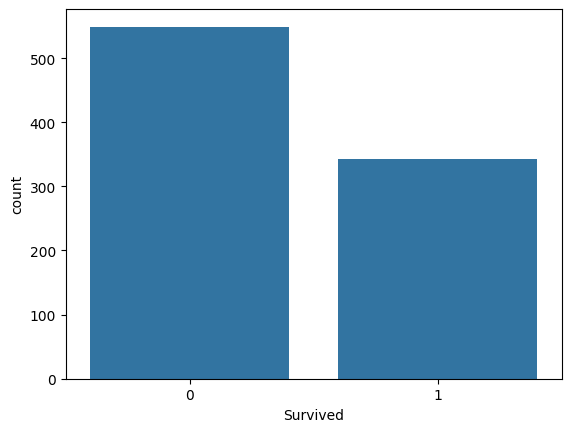

In [ ]:
sns.countplot(train_raw_df, x='Survived')

In [ ]:
deaths = (train_raw_df['Survived'] == 0).sum()
survivors = (train_raw_df['Survived'] == 1).sum()

deaths, survivors

(549, 342)

Siblings vs Survived then Parch vs Survived

In [ ]:
px.histogram(train_raw_df, x='SibSp', color='Survived', title='SibSp vs Survived')

No data points for 6/7 siblings, everyone with 5 or 8 died. It seems more siblings = more death.

<Axes: xlabel='SibSp', ylabel='count'>

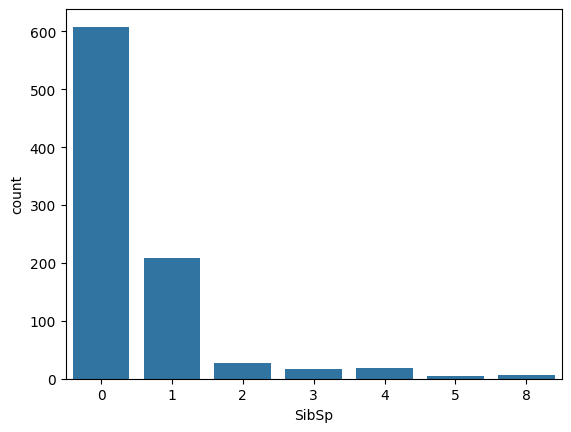

In [ ]:
sns.countplot(train_raw_df, x='SibSp')

<Axes: xlabel='SibSp', ylabel='count'>

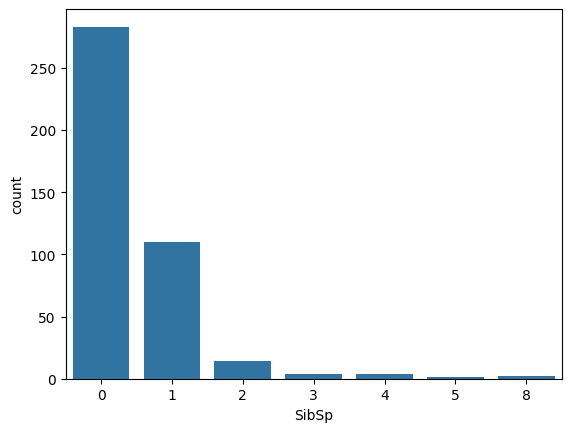

In [ ]:
sns.countplot(test_raw_df, x='SibSp')

In [ ]:
px.histogram(train_raw_df, x='Parch', color='Survived', title='Parch vs Survived')

<Axes: xlabel='Parch', ylabel='count'>

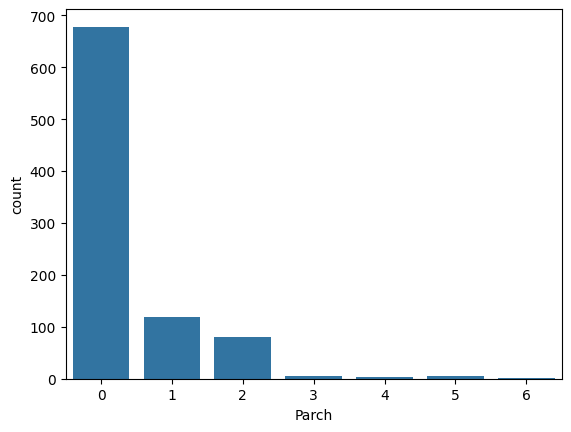

In [ ]:
sns.countplot(train_raw_df, x='Parch')

<Axes: xlabel='Parch', ylabel='count'>

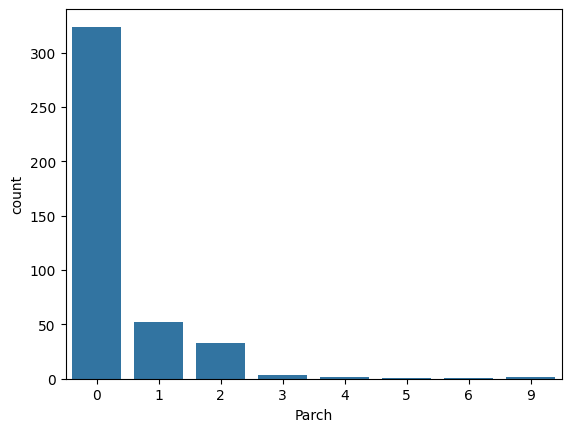

In [ ]:
sns.countplot(test_raw_df, x='Parch')

Inspect effects of sex

In [ ]:
px.histogram(train_raw_df, x='Sex', color='Survived', title='Sex vs Survived')

More males died

<Axes: xlabel='Sex', ylabel='count'>

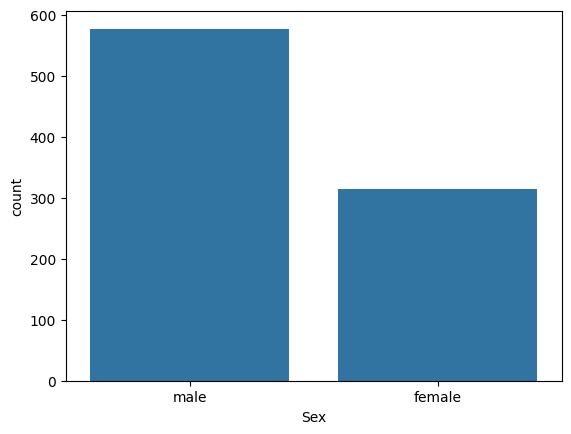

In [ ]:
sns.countplot(train_raw_df, x='Sex')

<Axes: xlabel='Sex', ylabel='count'>

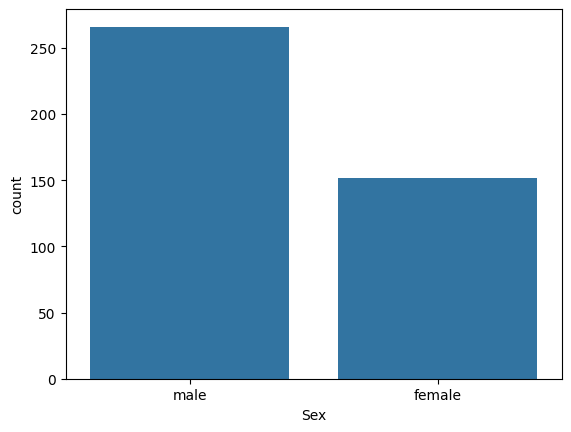

In [ ]:
sns.countplot(test_raw_df, x='Sex')

Now passenger class

In [ ]:
px.histogram(train_raw_df, x='Pclass', color='Survived', title='Pclass vs Survived')

More lower class died

<Axes: xlabel='Pclass', ylabel='count'>

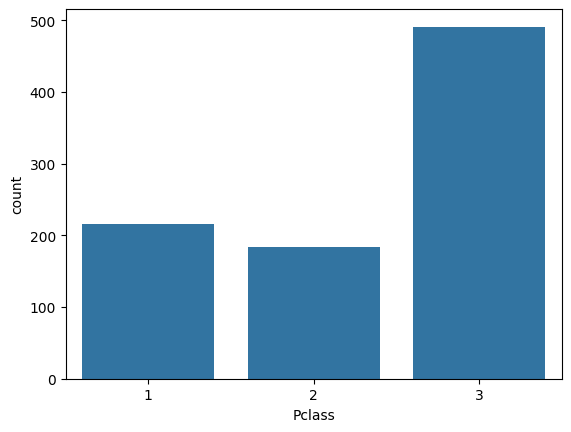

In [ ]:
sns.countplot(train_raw_df, x='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

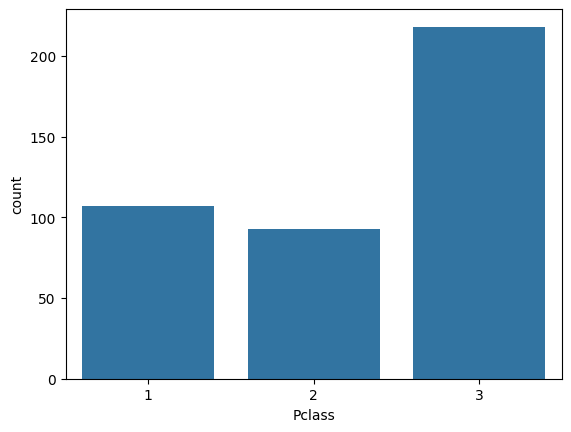

In [ ]:
sns.countplot(test_raw_df, x='Pclass')

Note: we inspected the distribution of each feature in the train and testing dfs to make sure they are similar.

In [ ]:
px.histogram(train_raw_df, x='Age', color='Survived')

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

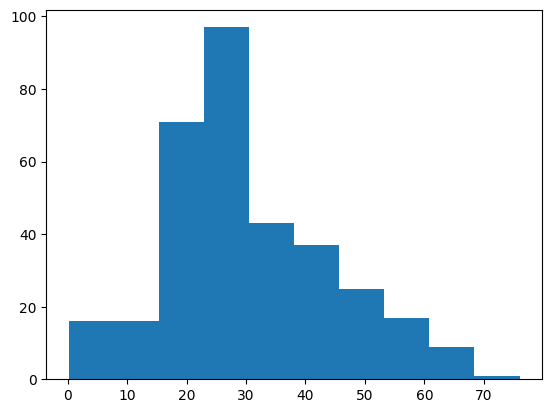

In [ ]:
plt.hist(test_raw_df['Age'])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

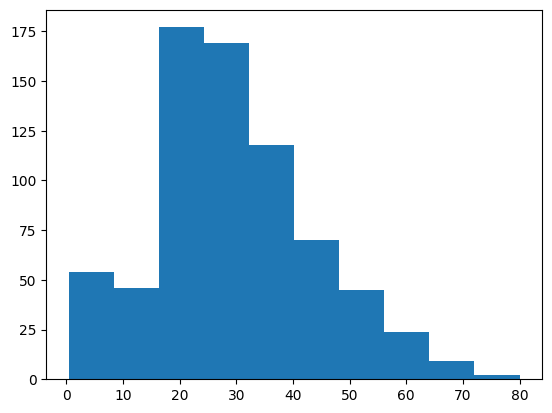

In [ ]:
plt.hist(train_raw_df['Age'])

Fares vs Survival

In [ ]:
px.histogram(train_raw_df, x='Fare', color='Survived')

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

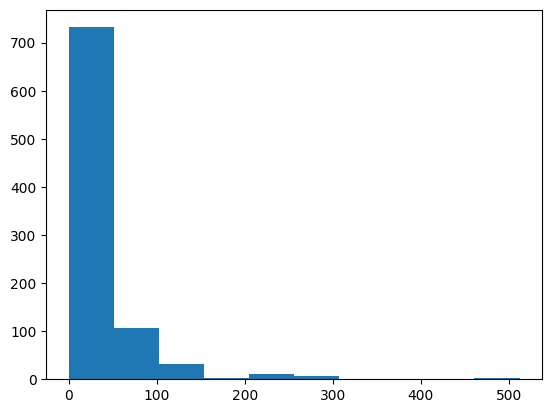

In [ ]:
plt.hist(train_raw_df['Fare'])

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

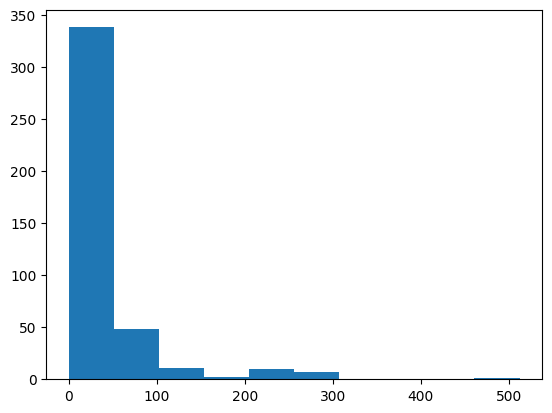

In [ ]:
plt.hist(test_raw_df['Fare'])

Lets do some feature engineering and split cabin into the cabin section and cabin number, handling nans appropriately

In [ ]:
train_raw_df[['Cabin_Deck', 'Cabin_Number']] = train_raw_df['Cabin'].str.extract(r'([A-Za-z]+)?(\d*)')

train_raw_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Deck,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,148


In [ ]:
test_raw_df[['Cabin_Deck', 'Cabin_Number']] = test_raw_df['Cabin'].str.extract(r'([A-Za-z]+)?(\d*)')

test_raw_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Deck,Cabin_Number
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C,105
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN


In [ ]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Cabin_Deck    204 non-null    object 
 13  Cabin_Number  204 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [ ]:
test_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    object 
 4   Age           332 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Fare          417 non-null    float64
 9   Cabin         91 non-null     object 
 10  Embarked      418 non-null    object 
 11  Cabin_Deck    91 non-null     object 
 12  Cabin_Number  91 non-null     object 
dtypes: float64(2), int64(4), object(7)
memory usage: 42.6+ KB


Further feature engineering ideas: determine family groups from last names

In [ ]:
px.histogram(train_raw_df, x='Cabin_Deck', color='Survived')

In [ ]:
px.histogram(train_raw_df, x='Cabin_Number', color='Survived')

Extract titles from names.

In [ ]:
train_raw_df['Title'] = train_raw_df['Name'].str.extract(r',\s*([^\.]+)\.')

In [ ]:
train_raw_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Deck,Cabin_Number,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,NaN,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,42,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,148,Mr


In [ ]:
train_raw_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
test_raw_df['Title'] = test_raw_df['Name'].str.extract(r',\s*([^\.]+)\.')

In [ ]:
test_raw_df['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [ ]:
px.histogram(train_raw_df, x='Title', color='Survived')

It seem apart from gender, title has little effect on survival.

#Data Preprocessing

In [ ]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Cabin_Deck    204 non-null    object 
 13  Cabin_Number  204 non-null    object 
 14  Title         891 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 104.5+ KB


In [ ]:
test_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    object 
 4   Age           332 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Fare          417 non-null    float64
 9   Cabin         91 non-null     object 
 10  Embarked      418 non-null    object 
 11  Cabin_Deck    91 non-null     object 
 12  Cabin_Number  91 non-null     object 
 13  Title         418 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 45.8+ KB


We need to impute the age and fare for the testing set. For cabin deck, we will add another label representing missing values. For the training set, impute age, cabin deck, and embarked. Since only 2 missing values in embarked, just delete those rows.

In [ ]:
train_raw_df = train_raw_df.dropna(subset=['Embarked'])

In [ ]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    object 
 5   Age           712 non-null    float64
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Cabin         202 non-null    object 
 11  Embarked      889 non-null    object 
 12  Cabin_Deck    202 non-null    object 
 13  Cabin_Number  202 non-null    object 
 14  Title         889 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 111.1+ KB


Now fill in nans in cabin-deck with another category

In [ ]:
train_raw_df['Cabin_Deck'].unique(), test_raw_df['Cabin_Deck'].unique()

(array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object))

In [ ]:
train_raw_df['Cabin_Deck'].fillna('U', inplace=True)
test_raw_df['Cabin_Deck'].fillna('U', inplace=True)

train_raw_df['Cabin_Deck'].unique(), test_raw_df['Cabin_Deck'].unique()

<ipython-input-51-b42434e4efae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object))

In [ ]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    object 
 5   Age           712 non-null    float64
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Cabin         202 non-null    object 
 11  Embarked      889 non-null    object 
 12  Cabin_Deck    889 non-null    object 
 13  Cabin_Number  202 non-null    object 
 14  Title         889 non-null    object 
dtypes: float64(2), int64(5), object(8)
memory usage: 111.1+ KB


In [ ]:
test_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    object 
 4   Age           332 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Fare          417 non-null    float64
 9   Cabin         91 non-null     object 
 10  Embarked      418 non-null    object 
 11  Cabin_Deck    418 non-null    object 
 12  Cabin_Number  91 non-null     object 
 13  Title         418 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 45.8+ KB


In [ ]:
px.histogram(train_raw_df, x='Cabin_Deck', color='Survived')

Impute the age distibution and the fare distribution on the testing set using iteraative imputation

One hot encode first.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Pclass', 'Embarked', 'Cabin_Deck']

encoder = OneHotEncoder(sparse_output=False)

encoder.fit(train_raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out())

train_raw_df[encoded_cols] = encoder.transform(train_raw_df[categorical_cols])
test_raw_df[encoded_cols] = encoder.transform(test_raw_df[categorical_cols])

train_raw_df['Sex'] = train_raw_df['Sex'].map({'male': 0, 'female': 1})
test_raw_df['Sex'] = test_raw_df['Sex'].map({'male': 0, 'female': 1})

train_raw_df

<ipython-input-55-643ec430be7f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-643ec430be7f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-643ec430be7f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-643e

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_U
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    int64  
 5   Age           712 non-null    float64
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Cabin         202 non-null    object 
 11  Embarked      889 non-null    object 
 12  Cabin_Deck    889 non-null    object 
 13  Cabin_Number  202 non-null    object 
 14  Title         889 non-null    object 
 15  Pclass_1      889 non-null    float64
 16  Pclass_2      889 non-null    float64
 17  Pclass_3      889 non-null    float64
 18  Embarked_C    889 non-null    float

In [ ]:
test_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Name          418 non-null    object 
 3   Sex           418 non-null    int64  
 4   Age           332 non-null    float64
 5   SibSp         418 non-null    int64  
 6   Parch         418 non-null    int64  
 7   Ticket        418 non-null    object 
 8   Fare          417 non-null    float64
 9   Cabin         91 non-null     object 
 10  Embarked      418 non-null    object 
 11  Cabin_Deck    418 non-null    object 
 12  Cabin_Number  91 non-null     object 
 13  Title         418 non-null    object 
 14  Pclass_1      418 non-null    float64
 15  Pclass_2      418 non-null    float64
 16  Pclass_3      418 non-null    float64
 17  Embarked_C    418 non-null    float64
 18  Embarked_Q    418 non-null    

In [ ]:
useless_cols = ['PassengerId', 'Pclass', 'Name', 'Ticket', 'Cabin', 'Cabin_Number', 'Cabin_Deck', 'Title', 'Embarked']
train_encoded_df = train_raw_df.drop(columns=useless_cols)
test_encoded_df = test_raw_df.drop(columns=useless_cols)

train_encoded_df

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Embarked_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_U
0,0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0,1,NaN,1,2,23.4500,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,0,26.0,0,0,30.0000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      889 non-null    int64  
 1   Sex           889 non-null    int64  
 2   Age           712 non-null    float64
 3   SibSp         889 non-null    int64  
 4   Parch         889 non-null    int64  
 5   Fare          889 non-null    float64
 6   Pclass_1      889 non-null    float64
 7   Pclass_2      889 non-null    float64
 8   Pclass_3      889 non-null    float64
 9   Embarked_C    889 non-null    float64
 10  Embarked_Q    889 non-null    float64
 11  Embarked_S    889 non-null    float64
 12  Cabin_Deck_A  889 non-null    float64
 13  Cabin_Deck_B  889 non-null    float64
 14  Cabin_Deck_C  889 non-null    float64
 15  Cabin_Deck_D  889 non-null    float64
 16  Cabin_Deck_E  889 non-null    float64
 17  Cabin_Deck_F  889 non-null    float64
 18  Cabin_Deck_G  889 non-null    float

In [ ]:
test_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           418 non-null    int64  
 1   Age           332 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          417 non-null    float64
 5   Pclass_1      418 non-null    float64
 6   Pclass_2      418 non-null    float64
 7   Pclass_3      418 non-null    float64
 8   Embarked_C    418 non-null    float64
 9   Embarked_Q    418 non-null    float64
 10  Embarked_S    418 non-null    float64
 11  Cabin_Deck_A  418 non-null    float64
 12  Cabin_Deck_B  418 non-null    float64
 13  Cabin_Deck_C  418 non-null    float64
 14  Cabin_Deck_D  418 non-null    float64
 15  Cabin_Deck_E  418 non-null    float64
 16  Cabin_Deck_F  418 non-null    float64
 17  Cabin_Deck_G  418 non-null    float64
 18  Cabin_Deck_T  418 non-null    

In [ ]:
train_encoded_df

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Embarked_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_U
0,0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0,1,NaN,1,2,23.4500,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,0,26.0,0,0,30.0000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)

imputer.fit(train_encoded_df.drop(['Survived'], axis=1))

test_imp_df = pd.DataFrame(imputer.transform(test_encoded_df), columns=test_encoded_df.columns)

test_imp_df

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_U
0,0.0,34.500000,0.0,0.0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,47.000000,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,62.000000,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,27.000000,0.0,0.0,8.6625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,22.000000,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,29.069230,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,1.0,39.000000,0.0,0.0,108.9000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.0,38.500000,0.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.0,29.069230,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_imp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           418 non-null    float64
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    float64
 3   Parch         418 non-null    float64
 4   Fare          418 non-null    float64
 5   Pclass_1      418 non-null    float64
 6   Pclass_2      418 non-null    float64
 7   Pclass_3      418 non-null    float64
 8   Embarked_C    418 non-null    float64
 9   Embarked_Q    418 non-null    float64
 10  Embarked_S    418 non-null    float64
 11  Cabin_Deck_A  418 non-null    float64
 12  Cabin_Deck_B  418 non-null    float64
 13  Cabin_Deck_C  418 non-null    float64
 14  Cabin_Deck_D  418 non-null    float64
 15  Cabin_Deck_E  418 non-null    float64
 16  Cabin_Deck_F  418 non-null    float64
 17  Cabin_Deck_G  418 non-null    float64
 18  Cabin_Deck_T  418 non-null    

Now split training sets to validation and then apply the imputation. We do this separately from the testing set as we will train on the training + validation set to get our final model to be evaluated on the testing set.

In [ ]:
from sklearn.model_selection import train_test_split

X = train_encoded_df.drop(['Survived'], axis=1)
y = train_encoded_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=35)

X_train_df = pd.DataFrame(X_train, columns=X.columns, index=X_train.index)
X_val_df = pd.DataFrame(X_val, columns=X.columns, index=X_val.index)

print(X_train_df.head())

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

print(X_val_df.head())

     Sex   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
881    0  33.0      0      0   7.8958       0.0       0.0       1.0   
194    1  44.0      0      0  27.7208       1.0       0.0       0.0   
403    0  28.0      1      0  15.8500       0.0       0.0       1.0   
653    1   NaN      0      0   7.8292       0.0       0.0       1.0   
602    0   NaN      0      0  42.4000       1.0       0.0       0.0   

     Embarked_C  Embarked_Q  Embarked_S  Cabin_Deck_A  Cabin_Deck_B  \
881         0.0         0.0         1.0           0.0           0.0   
194         1.0         0.0         0.0           0.0           1.0   
403         0.0         0.0         1.0           0.0           0.0   
653         0.0         1.0         0.0           0.0           0.0   
602         0.0         0.0         1.0           0.0           0.0   

     Cabin_Deck_C  Cabin_Deck_D  Cabin_Deck_E  Cabin_Deck_F  Cabin_Deck_G  \
881           0.0           0.0           0.0           0.0          

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=0)

imputer.fit(X_train_df)

X_train = pd.DataFrame(imputer.transform(X_train_df), columns=X_train_df.columns)
X_val = pd.DataFrame(imputer.transform(X_val_df), columns=X_val_df.columns)

X_train

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_U
0,0.0,33.000000,0.0,0.0,7.8958,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,44.000000,0.0,0.0,27.7208,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,28.000000,1.0,0.0,15.8500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,27.501173,0.0,0.0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,43.706809,0.0,0.0,42.4000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,0.0,28.686111,0.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
707,0.0,52.000000,0.0,0.0,30.5000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
708,0.0,66.000000,0.0,0.0,10.5000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
709,1.0,41.000000,0.0,1.0,19.5000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           711 non-null    float64
 1   Age           711 non-null    float64
 2   SibSp         711 non-null    float64
 3   Parch         711 non-null    float64
 4   Fare          711 non-null    float64
 5   Pclass_1      711 non-null    float64
 6   Pclass_2      711 non-null    float64
 7   Pclass_3      711 non-null    float64
 8   Embarked_C    711 non-null    float64
 9   Embarked_Q    711 non-null    float64
 10  Embarked_S    711 non-null    float64
 11  Cabin_Deck_A  711 non-null    float64
 12  Cabin_Deck_B  711 non-null    float64
 13  Cabin_Deck_C  711 non-null    float64
 14  Cabin_Deck_D  711 non-null    float64
 15  Cabin_Deck_E  711 non-null    float64
 16  Cabin_Deck_F  711 non-null    float64
 17  Cabin_Deck_G  711 non-null    float64
 18  Cabin_Deck_T  711 non-null    

In [ ]:
X_val.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           178 non-null    float64
 1   Age           178 non-null    float64
 2   SibSp         178 non-null    float64
 3   Parch         178 non-null    float64
 4   Fare          178 non-null    float64
 5   Pclass_1      178 non-null    float64
 6   Pclass_2      178 non-null    float64
 7   Pclass_3      178 non-null    float64
 8   Embarked_C    178 non-null    float64
 9   Embarked_Q    178 non-null    float64
 10  Embarked_S    178 non-null    float64
 11  Cabin_Deck_A  178 non-null    float64
 12  Cabin_Deck_B  178 non-null    float64
 13  Cabin_Deck_C  178 non-null    float64
 14  Cabin_Deck_D  178 non-null    float64
 15  Cabin_Deck_E  178 non-null    float64
 16  Cabin_Deck_F  178 non-null    float64
 17  Cabin_Deck_G  178 non-null    float64
 18  Cabin_Deck_T  178 non-null    

Now we do scaling of the columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.transform(test_imp_df), columns=test_imp_df.columns)

X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_U
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,0.347398,0.411317,0.065752,0.072574,0.060646,0.230661,0.218003,0.551336,0.171589,0.094233,0.734177,0.019691,0.042194,0.070323,0.033755,0.033755,0.016878,0.004219,0.001406,0.777778
std,0.476479,0.160203,0.143005,0.156075,0.093990,0.421552,0.413180,0.497708,0.377289,0.292359,0.442081,0.139033,0.201173,0.255871,0.180726,0.180726,0.128904,0.064865,0.037503,0.416032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.314654,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.395966,0.000000,0.000000,0.027058,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.488895,0.125000,0.000000,0.059532,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_val.describe()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Deck_U
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0,178.000000
mean,0.365169,0.413356,0.064607,0.092135,0.070647,0.280899,0.162921,0.556180,0.258427,0.056180,0.685393,0.005618,0.084270,0.050562,0.050562,0.044944,0.005618,0.005618,0.0,0.752809
std,0.482836,0.149663,0.116008,0.180536,0.108122,0.450706,0.370336,0.498235,0.439005,0.230918,0.465669,0.074953,0.278575,0.219719,0.219719,0.207765,0.074953,0.074953,0.0,0.432596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.326270,0.000000,0.000000,0.015530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,0.000000,0.407582,0.000000,0.000000,0.030303,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.512127,0.125000,0.200000,0.061045,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,0.825760,1.000000,1.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((711, 20), (178, 20), (418, 20))

In [ ]:
y_val = y_val.to_numpy()
y_train = y_train.to_numpy()

#Modelling

First determine accuracy of dumb models

In [ ]:
def assess_dumb_models(X_train, y_train, X_val, y_val):
  val_pred = np.random.randint(2, size=len(y_val))
  test_pred = np.random.randint(2, size=len(y_train))

  val_acc = np.mean(val_pred == y_val)
  train_acc = np.mean(test_pred == y_train)

  print(f"FOR RANDOM CHOICE, TRAIN ACC {train_acc}, VAL ACC {val_acc}")

  val_pred = np.zeros_like(y_val)
  test_pred = np.zeros_like(y_train)

  val_acc = np.mean(val_pred == y_val)
  train_acc = np.mean(test_pred == y_train)

  print(f"FOR ALL 0s, TRAIN ACC {train_acc}, VAL ACC {val_acc}")

assess_dumb_models(X_train, y_train, X_val, y_val)

FOR RANDOM CHOICE, TRAIN ACC 0.4838255977496484, VAL ACC 0.5674157303370787
FOR ALL 0s, TRAIN ACC 0.6216596343178622, VAL ACC 0.601123595505618


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def assess_model(X_train, X_val, y_train, y_val, model):
  model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  val_pred = model.predict(X_val)

  train_acc = accuracy_score(y_train, train_pred)
  val_acc = accuracy_score(y_val, val_pred)

  # class_report = classification_report(y_val, val_pred)
  # conf_mat = confusion_matrix(y_val, val_pred)

  print(f"TRAIN ACC {train_acc}, VAL ACC {val_acc}")

  # print("\n", "CLASSIFICATION REPORT", "\n")
  # print(class_report, "\n")
  # print("CONFUSION MATRIX", "\n")
  # print(conf_mat)

  return train_acc, val_acc

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

assess_model(X_train, X_val, y_train, y_val, log_reg)

TRAIN ACC 0.8171589310829818, VAL ACC 0.7584269662921348


(0.8171589310829818, 0.7584269662921348)

Test hyperparameters myself

In [ ]:
def assess_logreg(X_train, X_val, y_train, y_val, C, penalty, solver):
  log_reg = LogisticRegression(C=C, penalty=penalty, solver=solver)
  train_acc, val_acc = assess_model(X_train, X_val, y_train, y_val, log_reg)
  return train_acc, val_acc

In [ ]:
def tune_hyperparams(X_train, X_val, y_train, y_val, params):

  for solver in params['solver']:
    for penalty in params['penalty']:
      train_acc_arr = []
      val_acc_arr = []
      for C in params['C']:
        train_acc, val_acc = assess_logreg(X_train, X_val, y_train, y_val, C, penalty, solver)

        print(f"C: {C}, penalty: {penalty}, solver: {solver}, train_acc: {train_acc}, val_acc: {val_acc}")

        print("\n")

        val_acc_arr.append(val_acc)
        train_acc_arr.append(train_acc)

      plt.plot(params['C'], train_acc_arr, label=f'train {penalty} {solver}')
      plt.plot(params['C'], val_acc_arr, label=f'val {penalty} {solver}')
      plt.xscale('log')
      plt.legend()
      plt.show()

TRAIN ACC 0.8255977496483825, VAL ACC 0.7921348314606742
C: 0.12, penalty: l2, solver: liblinear, train_acc: 0.8255977496483825, val_acc: 0.7921348314606742


TRAIN ACC 0.8255977496483825, VAL ACC 0.7921348314606742
C: 0.1202020202020202, penalty: l2, solver: liblinear, train_acc: 0.8255977496483825, val_acc: 0.7921348314606742


TRAIN ACC 0.8255977496483825, VAL ACC 0.7921348314606742
C: 0.1204040404040404, penalty: l2, solver: liblinear, train_acc: 0.8255977496483825, val_acc: 0.7921348314606742


TRAIN ACC 0.8255977496483825, VAL ACC 0.7921348314606742
C: 0.1206060606060606, penalty: l2, solver: liblinear, train_acc: 0.8255977496483825, val_acc: 0.7921348314606742


TRAIN ACC 0.8255977496483825, VAL ACC 0.7921348314606742
C: 0.12080808080808081, penalty: l2, solver: liblinear, train_acc: 0.8255977496483825, val_acc: 0.7921348314606742


TRAIN ACC 0.8255977496483825, VAL ACC 0.7921348314606742
C: 0.12101010101010101, penalty: l2, solver: liblinear, train_acc: 0.8255977496483825, val_

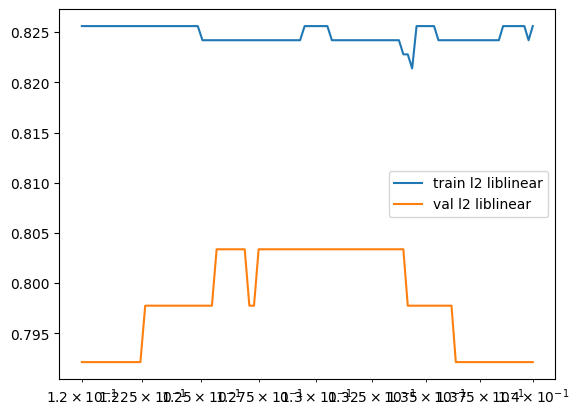

TRAIN ACC 0.8227848101265823, VAL ACC 0.8089887640449438
C: 0.12, penalty: l2, solver: saga, train_acc: 0.8227848101265823, val_acc: 0.8089887640449438


TRAIN ACC 0.8227848101265823, VAL ACC 0.8089887640449438
C: 0.1202020202020202, penalty: l2, solver: saga, train_acc: 0.8227848101265823, val_acc: 0.8089887640449438


TRAIN ACC 0.8227848101265823, VAL ACC 0.8089887640449438
C: 0.1204040404040404, penalty: l2, solver: saga, train_acc: 0.8227848101265823, val_acc: 0.8089887640449438


TRAIN ACC 0.8227848101265823, VAL ACC 0.8089887640449438
C: 0.1206060606060606, penalty: l2, solver: saga, train_acc: 0.8227848101265823, val_acc: 0.8089887640449438


TRAIN ACC 0.8227848101265823, VAL ACC 0.8089887640449438
C: 0.12080808080808081, penalty: l2, solver: saga, train_acc: 0.8227848101265823, val_acc: 0.8089887640449438


TRAIN ACC 0.8227848101265823, VAL ACC 0.8089887640449438
C: 0.12101010101010101, penalty: l2, solver: saga, train_acc: 0.8227848101265823, val_acc: 0.8089887640449438


TRAI

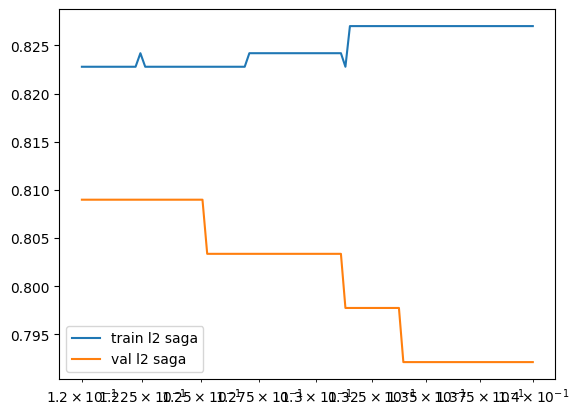

In [ ]:
params = {'C': np.linspace(0.12, 0.14, 100), 'penalty': ['l2'], 'solver': ['liblinear', 'saga']}

tune_hyperparams(X_train, X_val, y_train, y_val, params)

Now try support vector machines

In [ ]:
from sklearn.svm import SVC

def assess_svm(X_train, X_val, y_train, y_val, C, kernel, gamma, degree):
  svm = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree)
  train_acc, val_acc = assess_model(X_train, X_val, y_train, y_val, svm)
  return train_acc, val_acc

def tune_hyperparams_svm(X_train, X_val, y_train, y_val, params):
  train_acc_arr = 0
  val_acc_arr = 0
  optimal_params = {}
  kernel = 'poly'
  for degree in params['degree']:
    for gamma in params['gamma']:
      for C in params['C']:
        train_acc, val_acc = assess_svm(X_train, X_val, y_train, y_val, C, kernel, gamma, degree)
        print(f"C: {C}, kernel: {kernel} {degree}, gamma: {gamma}, train_acc: {train_acc}, val_acc: {val_acc}")
        print("\n")

        train_acc_arr = max(train_acc_arr, train_acc)
        val_acc_arr = max(val_acc_arr, val_acc)

        if val_acc_arr == val_acc:
          optimal_params['train_acc'] = train_acc
          optimal_params['val_acc'] = val_acc
          optimal_params['kernel'] = kernel
          optimal_params['gamma'] = gamma
          optimal_params['C'] = C

  print(f"Optimal params: {optimal_params}")

In [ ]:
parmas = {'C': [1e-4, 1e-3, 1e-2, 1e-1, 1], 'kernel': ['poly'], 'gamma': ['scale', 1e-3, 1e-2, 1e-1, 1, 1e1], 'degree': [2]}

tune_hyperparams_svm(X_train, X_val, y_train, y_val, parmas)

TRAIN ACC 0.6216596343178622, VAL ACC 0.601123595505618
C: 0.0001, kernel: poly 2, gamma: scale, train_acc: 0.6216596343178622, val_acc: 0.601123595505618


TRAIN ACC 0.6216596343178622, VAL ACC 0.601123595505618
C: 0.001, kernel: poly 2, gamma: scale, train_acc: 0.6216596343178622, val_acc: 0.601123595505618


TRAIN ACC 0.6947960618846695, VAL ACC 0.7303370786516854
C: 0.01, kernel: poly 2, gamma: scale, train_acc: 0.6947960618846695, val_acc: 0.7303370786516854


TRAIN ACC 0.7918424753867792, VAL ACC 0.7640449438202247
C: 0.1, kernel: poly 2, gamma: scale, train_acc: 0.7918424753867792, val_acc: 0.7640449438202247


TRAIN ACC 0.8255977496483825, VAL ACC 0.7921348314606742
C: 1, kernel: poly 2, gamma: scale, train_acc: 0.8255977496483825, val_acc: 0.7921348314606742


TRAIN ACC 0.6216596343178622, VAL ACC 0.601123595505618
C: 0.0001, kernel: poly 2, gamma: 0.001, train_acc: 0.6216596343178622, val_acc: 0.601123595505618


TRAIN ACC 0.6216596343178622, VAL ACC 0.601123595505618
C: 0.00

Now decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=29)

assess_model(X_train, X_val, y_train, y_val, model)

TRAIN ACC 0.9915611814345991, VAL ACC 0.7752808988764045


(0.9915611814345991, 0.7752808988764045)

In [ ]:
def assess_dt(X_train, X_val, y_train, y_val, **kwargs):
  dt = DecisionTreeClassifier(**kwargs)
  train_acc, val_acc = assess_model(X_train, X_val, y_train, y_val, dt)
  return train_acc, val_acc

def tune_hyperparams_dt(X_train, X_val, y_train, y_val, params):
  train_acc_arr = 0
  val_acc_arr = 0
  optimal_params = {}
  input_params = {}

  for j in range(1000):
    print(j)
    for i in params.keys():
      if i == 'criterion':
        x = np.random.uniform(0, 1)
        if x > 0.5:
          input_params[i] = 'entropy'
        else:
          input_params[i] = 'gini'

      elif i == 'splitter':
        x = np.random.uniform(0, 1)
        if x > 0.5:
          input_params[i] = 'best'
        else:
          input_params[i] = 'random'
      else:
        input_params[i] = int(np.random.uniform(low=params[i][0], high=params[i][1]))



    train_acc, val_acc = assess_dt(X_train, X_val, y_train, y_val, **input_params)
    print(f"{input_params} train_acc: {train_acc}, val_acc: {val_acc}")
    print("\n")

    train_acc_arr = max(train_acc_arr, train_acc)
    val_acc_arr = max(val_acc_arr, val_acc)

    if val_acc_arr == val_acc:
      optimal_params['train_acc'] = train_acc
      optimal_params['val_acc'] = val_acc
      optimal_params['params'] = input_params

  print(f"Optimal params: {optimal_params}")

In [ ]:
parmas = {'max_depth': (2, 25), 'max_leaf_nodes': (10, 250), 'min_samples_split': (2, 10), 'min_samples_leaf': (1, 10), 'criterion': ['entropy', 'gini'], 'splitter': ['best', 'random']}

tune_hyperparams_dt(X_train, X_val, y_train, y_val, parmas)

Streaming output truncated to the last 5000 lines.
TRAIN ACC 0.8241912798874824, VAL ACC 0.8033707865168539
{'max_depth': 4, 'max_leaf_nodes': 89, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini', 'splitter': 'random'} train_acc: 0.8241912798874824, val_acc: 0.8033707865168539


1
TRAIN ACC 0.8523206751054853, VAL ACC 0.7921348314606742
{'max_depth': 6, 'max_leaf_nodes': 65, 'min_samples_split': 7, 'min_samples_leaf': 4, 'criterion': 'entropy', 'splitter': 'random'} train_acc: 0.8523206751054853, val_acc: 0.7921348314606742


2
TRAIN ACC 0.8466947960618847, VAL ACC 0.7584269662921348
{'max_depth': 18, 'max_leaf_nodes': 32, 'min_samples_split': 3, 'min_samples_leaf': 2, 'criterion': 'entropy', 'splitter': 'random'} train_acc: 0.8466947960618847, val_acc: 0.7584269662921348


3
TRAIN ACC 0.8621659634317862, VAL ACC 0.7696629213483146
{'max_depth': 22, 'max_leaf_nodes': 160, 'min_samples_split': 5, 'min_samples_leaf': 9, 'criterion': 'entropy', 'splitter': 'best'} train_

Random Forest time with cross validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=224, random_state=29)

assess_model(X_train, X_val, y_train, y_val, model)

TRAIN ACC 0.9915611814345991, VAL ACC 0.7808988764044944


(0.9915611814345991, 0.7808988764044944)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(random_state=29)

param = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 4, 8, 12, 16, 20, 24],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=50, cv=3, verbose=3, random_state=42, n_jobs=1)

random_search.fit(X_train, y_train)

print("BEST PARAMS ", random_search.best_params_)
print("VAL ACC ", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.835 total time=   0.9s
[CV 2/3] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.789 total time=   1.2s
[CV 3/3] END bootstrap=False, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.848 total time=   2.0s
[CV 1/3] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.865 total time=   2.9s
[CV 2/3] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.797 total time=   1.6s
[CV 3/3] END bootstrap=True, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.869 total time=   1.8s
[CV 1/3] END bootstr

Gradient Boosting Machines

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=29)

assess_model(X_train, X_val, y_train, y_val, model)

TRAIN ACC 0.980309423347398, VAL ACC 0.7808988764044944


(0.980309423347398, 0.7808988764044944)

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [400],
    'learning_rate': [0.01],
    'max_depth': [9, 12, 15],
}

grid_search = GridSearchCV(estimator=model, param_grid=param, cv=10, n_jobs=1, verbose=4, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("BEST PARAMS ", grid_search.best_params_)
print("VAL ACC ", grid_search.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END learning_rate=0.01, max_depth=3, n_estimators=400;, score=0.819 total time=   4.5s
[CV 2/10] END learning_rate=0.01, max_depth=3, n_estimators=400;, score=0.901 total time=   2.0s
[CV 3/10] END learning_rate=0.01, max_depth=3, n_estimators=400;, score=0.859 total time=   1.5s
[CV 4/10] END learning_rate=0.01, max_depth=3, n_estimators=400;, score=0.775 total time=   3.1s
[CV 5/10] END learning_rate=0.01, max_depth=3, n_estimators=400;, score=0.775 total time=   0.1s
[CV 6/10] END learning_rate=0.01, max_depth=3, n_estimators=400;, score=0.887 total time=   0.1s
[CV 7/10] END learning_rate=0.01, max_depth=3, n_estimators=400;, score=0.761 total time=   0.1s
[CV 8/10] END learning_rate=0.01, max_depth=3, n_estimators=400;, score=0.831 total time=   0.1s
[CV 9/10] END learning_rate=0.01, max_depth=3, n_estimators=400;, score=0.831 total time=   0.1s
[CV 10/10] END learning_rate=0.01, max_depth=3, n_estimators=400;,

saga with 0.12 for C, or liblinear with 0.13 for C

In [ ]:
model = LogisticRegression(C=0.13, solver='liblinear', penalty='l2')

X = np.concatenate([X_train, X_val], axis=0)
model.fit(X, np.concatenate([y_train, y_val], axis=0))
train_pred = model.predict(X)
train_acc = accuracy_score(np.concatenate([y_train, y_val], axis=0), train_pred)

# model.fit(X_train, y_train)
# train_pred = model.predict(X_train)
# train_acc = accuracy_score(y_train, train_pred)

test_pred = model.predict(X_test)
print(train_acc)

0.8143982002249719


SVM with C=10, gamm=1, rbf kernel

In [ ]:
model = SVC(C=10, kernel='rbf', gamma=1)

X = np.concatenate([X_train, X_val], axis=0)
model.fit(X, np.concatenate([y_train, y_val], axis=0))
train_pred = model.predict(X)
train_acc = accuracy_score(np.concatenate([y_train, y_val], axis=0), train_pred)

# model.fit(X_train, y_train)
# train_pred = model.predict(X_train)
# train_acc = accuracy_score(y_train, train_pred)

test_pred = model.predict(X_test)
print(train_acc)

0.8537682789651294


In [ ]:
model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=40, min_samples_split=2, min_samples_leaf=5, criterion='entropy', splitter= 'best')
X = np.concatenate([X_train, X_val], axis=0)
model.fit(X, np.concatenate([y_train, y_val], axis=0))
train_pred = model.predict(X)
train_acc = accuracy_score(np.concatenate([y_train, y_val], axis=0), train_pred)

# model.fit(X_train, y_train)
# train_pred = model.predict(X_train)
# train_acc = accuracy_score(y_train, train_pred)

test_pred = model.predict(X_test)
print(train_acc)

0.8413948256467941


In [ ]:
params = {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 16, 'bootstrap': False}
model = RandomForestClassifier(**params)

X = np.concatenate([X_train, X_val], axis=0)
model.fit(X, np.concatenate([y_train, y_val], axis=0))
train_pred = model.predict(X)
train_acc = accuracy_score(np.concatenate([y_train, y_val], axis=0), train_pred)

test_pred = model.predict(X_test)
print(train_acc)

0.9178852643419573


In [ ]:
params = {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 400}

model = XGBClassifier(**params)

X = np.concatenate([X_train, X_val], axis=0)
model.fit(X, np.concatenate([y_train, y_val], axis=0))
train_pred = model.predict(X)

train_acc = accuracy_score(np.concatenate([y_train, y_val], axis=0), train_pred)

test_pred = model.predict(X_test)
print(train_acc)

0.9302587176602924


Ensemble these models together using voting

In [ ]:
from sklearn.ensemble import VotingClassifier

X = np.concatenate([X_train, X_val], axis=0)
y = np.concatenate([y_train, y_val], axis=0)

log_reg = LogisticRegression(C=0.13, solver='liblinear', penalty='l2')
svm = SVC(C=10, kernel='rbf', gamma=1, probability=True)
dt = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=40, min_samples_split=2, min_samples_leaf=5, criterion='entropy', splitter= 'best')
rf = RandomForestClassifier(n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', max_depth=16, bootstrap=False)
xgb = XGBClassifier(learning_rate=0.01, max_depth=9, n_estimators=400)

voting_clf = VotingClassifier(estimators=[('log_reg', log_reg), ('svm', svm), ('dt', dt), ('rf', rf), ('xgb', xgb)], voting='hard')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_train)

print(accuracy_score(y_train, y_pred))

y_pred = voting_clf.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.8987341772151899
0.8089887640449438


In [ ]:

voting_clf.fit(X, y)

y_pred = voting_clf.predict(X)

print(accuracy_score(y, y_pred))

test_pred = voting_clf.predict(X_test)

0.8875140607424072


Ensemble with stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

base_learners = [('log_reg', log_reg), ('svm', svm), ('dt', dt), ('rf', rf), ('xgb', xgb)]

meta_learner = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_train)

print(accuracy_score(y_train, y_pred))

y_pred = stacking_clf.predict(X_val)

print(accuracy_score(y_val, y_pred))

0.9324894514767933
0.7808988764044944


In [ ]:
param_grid = {'final_estimator__C': [0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 10.0],
              'final_estimator__penalty': ['l2']}

grid_search = GridSearchCV(estimator=stacking_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=3, n_jobs=1)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END final_estimator__C=0.01, final_estimator__penalty=l2;, score=0.823 total time=   6.3s
[CV 2/3] END final_estimator__C=0.01, final_estimator__penalty=l2;, score=0.764 total time=   6.2s
[CV 3/3] END final_estimator__C=0.01, final_estimator__penalty=l2;, score=0.781 total time=   4.8s
[CV 1/3] END final_estimator__C=0.03, final_estimator__penalty=l2;, score=0.882 total time=   7.6s
[CV 2/3] END final_estimator__C=0.03, final_estimator__penalty=l2;, score=0.781 total time=   4.7s
[CV 3/3] END final_estimator__C=0.03, final_estimator__penalty=l2;, score=0.840 total time=   6.8s
[CV 1/3] END final_estimator__C=0.05, final_estimator__penalty=l2;, score=0.878 total time=   8.0s
[CV 2/3] END final_estimator__C=0.05, final_estimator__penalty=l2;, score=0.785 total time=   4.7s
[CV 3/3] END final_estimator__C=0.05, final_estimator__penalty=l2;, score=0.848 total time=   7.3s
[CV 1/3] END final_estimator__C=0.1, final_estim

In [ ]:
meta_learner = LogisticRegression(C=2.0, penalty='l2')

stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacking_clf.fit(X, y)

y_pred = stacking_clf.predict(X)

print(accuracy_score(y, y_pred))

test_pred = stacking_clf.predict(X_test)

0.9145106861642295


In [ ]:
submission_df = pd.read_csv('titanic/gender_submission.csv')

submission_df['Survived'] = test_pred

submission_df.to_csv('sub.csv', index=False)